# Proyecto 1. ANÁLISIS ESTADÍSTICO
## Bioseñales y sistemas. 2024
### María J. Ostos, Cristian Florez, Juan A. Sañudo


## CONTEXTO
#### - Enfermedades Neurodegenerativas 
Enfermedad de Parkinson, Huntington y Esclerosis lateral amiotrófica. El diagnóstico temprano de las enfermedades mencionadas anteriormente es desafiante debido a la variabilidad y el solapamiento de sus síntomas iniciales, que a menudo son inespecíficos y pueden ser confundidos con otras afecciones menos graves. Además, la falta de biomarcadores definitivos y la evolución gradual de los síntomas dificultan la identificación temprana de estas enfermedades neurodegenerativas. La mejora en técnicas de imagen, pruebas genéticas y biomarcadores está en progreso, pero aún se necesita avanzar en la detección precoz para poder intervenir antes de que se produzca un daño significativo.


Enfermedad de Parkinson(EP) se presencia principalmente por temblores, sensación de extremidades inferiores rígidas, disminución de movimientos automáticos, alteración del equilibrio y la marcha, dolores musculares, depresión, ansiedad, estrés y demencia. 
Su diagnóstico es clínico y se confirma con un informe anatomopatológico, es decir las características de muestra de tejidos del paciente, se puede observar despigmentación de la sustancia nigra, y microscópicamente con la presencia de cuerpos de Lewy (proteína malformada y agregada, a-sinucleina).

Huntington: Es causada por la expansión de un secuencia repetitiva de ACG en el primer intrón del gen HTT (Huntingtina). Causa movimientos involuntarios, pérdida cognitiva y trastornos psiquiátricos. Se diagnostican mediante prueba molecular, funcional, psiquiátrica y conoscitivas y se apoya con estudio de neuroimagen ya que se observan las neuronas espinosas medianas del estriado.

Esclerosis lateral amiotrófica (ELA): Perdida rápida de motoneuronas superiores e inferiores, se presenta en  debilidad muscular, espasticidad, hiperreflexia, afecta principalmente la función respiratoria. La ELA se debe a mutaciones en el cromosoma 21 en el gen (SOD1), factores ambientales, fenómenos de autoinmunidad, extrés oxidativo, excitotoxicidad, entre otros. Su diagnóstico es mediante criterios de afecciones de las motoneuronas central o periférica en parte bulbar, cervical, torácica y lumbar; La evalución clínica contempla la capacidad de autocuidado y la función respiratoria del paciente. [1][2]

#### - Función Detrend de Scipy
detrend(data,'linear')
Eliminar la tendencia lineal a lo largo del eje de los datos.
El detrend implica modelar y eliminar la tendencia subyacente de la serie temporal para analizar las fluctuaciones alrededor de esta tendencia. [3] [4]


Serie Temporal y(t) = A + Bt + et
- Ajustar modelo de tendencia lineal: Por medio de regresión linear se estima A y B a partir de la serie temporal. y(t)' = A' + B't 
- Restar la tendencia y(t)-y(t)' 
- detrend = y(t) - (A' + B't) 

#### - Filtro Hampel
Es un filtro no lineal que se usa para encontrar valores atípicos permitiendo suavizar la señal, lo hace evaluando la mediana y la desviación estándar (mediante la desviación absoluta media) de los puntos cercanos, si el valor sobrepasa más de 3 desviaciones estándar, se sustituye por la mediana.

- DAM = mediana (|Xi - x'|)
- x' = mediana(Xi)

#### - Entropía de permutación
Es una herrmienta que permite analizar la complejidad y la estructura de las series temporales, es decir permite evaluar las permutaciones posibles de los valores y contar con que frecuencia ocurren. La entropía de permutación se calcula a partir de las frecuencias de las permutaciones y mide la aleatoriedad en la serie temporal [6].  INSERTAR FORMULA

En bioingeniería, proporciona una forma de evaluar la variabilidad y la regularidad en señales biológicas, ofreciendo información valiosa sobre la salud y el funcionamiento de sistemas biológicos complejos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import os
import scipy.signal as signal 

1. Crear una rutina que permita cargar un archivo .ts y extraiga las 4 señales de interés almacenelas en un ndarray.

In [3]:
# Función para cargar y extraer las señales de interés
def adquirir(file_path):
    names = [
        'Elapsed Time (sec)', 'Left Stride Interval (sec)', 'Right Stride Interval (sec)',
        'Left Swing Interval (sec)', 'Right Swing Interval (sec)', 'Left Swing Interval (% of stride)', 
        'Right Swing Interval (% of stride)', 'Left Stance Interval (sec)', 'Right Stance Interval (sec)',
        'Left Stance Interval (% of stride)', 'Right Stance Interval (% of stride)', 'Double Support Interval (sec)', 
        'Double Support Interval (% of stride)'
    ]
    
    data = pd.read_csv(file_path, delimiter='\t', names=names)
    
    columns_of_interest = [
        'Left Stride Interval (sec)', 'Right Stride Interval (sec)', 
        'Left Swing Interval (sec)', 'Right Swing Interval (sec)'
    ]
    
    signals = data[columns_of_interest].to_numpy()
    return signals

2. Para cada señal eliminar los errores en tendencia usando la rutina detrend

In [4]:

def remove_trend(signals,file_name):
    detrended_signals = signal.detrend(signals, axis=0)
    
    # Graficar las señales originales y las señales sin tendencia
    num_signals = signals.shape[1]  # Número de canales
    cols = 4  # 4 columnas por fila
    rows = num_signals // cols + int(num_signals % cols > 0)  # Número de filas necesarias
    
    column_names = ['Left Stride Interval (sec)', 'Right Stride Interval (sec)','Left Swing Interval (sec)', 'Right Swing Interval (sec)']
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 3))  # Tamaño ajustado a la cantidad de subplots
    fig.suptitle(f'Señales Filtradas de Detrend - {file_name}', fontsize=16)
    axes = axes.flatten()  # Aplanamos los ejes para poder indexarlos fácilmente
    
    for i in range(num_signals):
        # Graficar la señal original
        axes[i].plot(signals[:, i], label='Señal Original')
        axes[i].plot(detrended_signals[:, i], label='Señal con Detrend', color='red')
        # axes[i].set_title(f'Canal {i+1}')
        axes[i].set_title(f'{column_names[i]}')
        axes[i].legend()
        axes[i].grid()

    # Eliminar ejes vacíos en caso de que no sean divisibles exactamente
    for i in range(num_signals, len(axes)):
        fig.delaxes(axes[i])

    # Mostrar las gráficas
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustamos para no solapar con el título
    plt.show()

    return detrended_signals

3. Para cada señal resultante del paso 2 eliminar los datos atípicos usando filtro hampel

In [23]:
# Filtro de Hampel
def hampelfilter(signal: np.ndarray, w: int, sigma: int) -> np.ndarray:
    yk = np.copy(signal)  # Inicializa la señal filtrada (copia de la original)
    
    for i in range(w, len(signal) - w):
        ventana = signal[i - w:i + w + 1]
        ref = np.median(ventana)  # Calcula la mediana de la ventana.
        AbsDev = abs(ventana - ref)
        MAD = 1.4826 * np.median(AbsDev)  # Calcula el MAD para la ventana.
        
        TestVal = abs(signal[i] - ref)  # Diferencia del punto con la mediana.
        
        # Reemplaza el valor por la mediana si excede sigma * MAD
        if TestVal > sigma * MAD:
            yk[i] = ref

    return yk

In [60]:
def apply_hampel_and_plot(signal, w, sigma, file_name):
    """ Aplica el filtro de Hampel a la señal y grafica la señal original y filtrada. """
    filtered_signal = hampelfilter(signal, w, sigma)  # Aplicar el filtro de Hampel
    
    # Graficar las señales originales y las señales sin tendencia
    num_signals = 4  # Número de canales
    cols = 4  # 4 columnas por fila
    rows = num_signals // cols + int(num_signals % cols > 0)  # Número de filas necesarias
    
    column_names = ['Left Stride Interval (sec)', 'Right Stride Interval (sec)','Left Swing Interval (sec)', 'Right Swing Interval (sec)']
    
    # fig, ax = plt.subplots(rows, cols, figsize=(15, 3))  # Tamaño ajustado a la cantidad de subplots
    # fig.suptitle(f'Señales Filtradas de Detrend - {file_name}', fontsize=16)
    # axes = axes.flatten()  # Aplanamos los ejes para poder indexarlos fácilmente
    
    
    # Graficar la señal original y la filtrada
    fig, ax = plt.subplots(figsize=(15, 2))  # Crear la figura para la gráfica
    ax.plot(signal, label='Señal Original')  # Graficar la señal original
    ax.plot(filtered_signal, label='Señal con Hampel Filter', color='green')  # Graficar la señal filtrada
    ax.set_title(f'Señal Original vs Hampel Filtered - {file_name}')
    ax.legend()
    ax.grid()
    
    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()
    
    return filtered_signal  # Retornar la señal filtrada


4. Crear una función que reciba una señal de marcha y calcule el coeficiente de variación (CV) y la SD tal como se define en el artículo de referencia

In [7]:
def calculate_cv_sd(signal):
    mean_val = np.abs(np.mean(signal))
    sd_val = np.std(signal)
    cv_val = 100 * (sd_val / mean_val) 
    return cv_val, sd_val

5. Crear una función que reciba una señal de marcha y permita calcular la entropía de permutación

In [8]:
import math
from collections import Counter
# Función para calcular la entropía de permutación
def calculate_permutation_entropy(time_series, D, tau):
    column_matrix = []
    for i in range(len(time_series) - (D - 1) * tau):
        column_vector = [time_series[i + j * tau] for j in range(D)]
        column_matrix.append(column_vector)

    permutations = []
    for column_vector in column_matrix:
        permutation = sorted(range(len(column_vector)), key=lambda k: column_vector[k])
        permutations.append(tuple(permutation))

    relative_frequencies = Counter(permutations)
    total_permutations = len(permutations)
    for permutation in relative_frequencies:
        relative_frequencies[permutation] /= total_permutations

    PE = -sum(f * math.log(f, D) for f in relative_frequencies.values())
    return PE, relative_frequencies

6. Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 1 y almacene los resultados en un dataframe donde se pueda discriminar nombre participante, condición (Parkinson, Huntington, ELA, Control) y los tres índices/características calculados por cada señal

In [9]:
import re  # Importar la librería de expresiones regulares para extraer los números

# Función para ordenar archivos numéricamente
def numerical_sort(value):
    """ Extrae el número del nombre del archivo para ordenarlo numéricamente. """
    numbers = re.findall(r'\d+', value)  # Busca todos los números en el nombre del archivo
    return int(numbers[0]) if numbers else -1  # Convierte el número a entero y lo devuelve

# Función para procesar todos los sujetos en una carpeta
def process_all_subjects(folder_path, title):
    results = []

    files = sorted([f for f in os.listdir(folder_path)], key=numerical_sort)

    for file_name in files:
        file_path = os.path.join(folder_path,file_name)
        # Cargar y extraer las señales
        signals = adquirir(file_path)
        
        # Remover tendencia
        detrended_signals = remove_trend(signals,file_name)
        
        # Eliminar valores atípicos
        filtered_signals = np.zeros_like(detrended_signals)
        for i in range(detrended_signals.shape[1]):
            
            filtered_signals[:, i] = apply_hampel_and_plot(detrended_signals[:, i], w=10, sigma=3,file_name=file_name)
        
        # Calcular características para cada señal
        cv_left_stride, sd_left_stride = calculate_cv_sd(filtered_signals[:, 0])
        ent_left_stride, _ = calculate_permutation_entropy(filtered_signals[:, 0], D=3, tau=1)
        
        cv_right_stride, sd_right_stride = calculate_cv_sd(filtered_signals[:, 1])
        ent_right_stride, _ = calculate_permutation_entropy(filtered_signals[:, 1], D=3, tau=1)
        
        cv_left_swing, sd_left_swing = calculate_cv_sd(filtered_signals[:, 2])
        ent_left_swing, _ = calculate_permutation_entropy(filtered_signals[:, 2], D=3, tau=1)
        
        cv_right_swing, sd_right_swing = calculate_cv_sd(filtered_signals[:, 3])
        ent_right_swing, _ = calculate_permutation_entropy(filtered_signals[:, 3], D=3, tau=1)
        
        # Almacenar los resultados en un diccionario con el formato solicitado
        results.append({
            'Subject': file_name.split('.')[0],  # Nombre del archivo sin extensión
            'Condition': title,
            'Entropy_Left Stride Interval': ent_left_stride,
            'CV_Left Stride Interval': cv_left_stride,
            'SD_Left Stride Interval': sd_left_stride,
            'Entropy_Right Stride Interval': ent_right_stride,
            'CV_Right Stride Interval': cv_right_stride,
            'SD_Right Stride Interval': sd_right_stride,
            'Entropy_Left Swing Interval': ent_left_swing,
            'CV_Left Swing Interval': cv_left_swing,
            'SD_Left Swing Interval': sd_left_swing,
            'Entropy_Right Swing Interval': ent_right_swing,
            'CV_Right Swing Interval': cv_right_swing,
            'SD_Right Swing Interval': sd_right_swing
        })
    
    # Convertir los resultados en un DataFrame
    results_df = pd.DataFrame(results)
    return results_df


Definir ruta. CONTROL

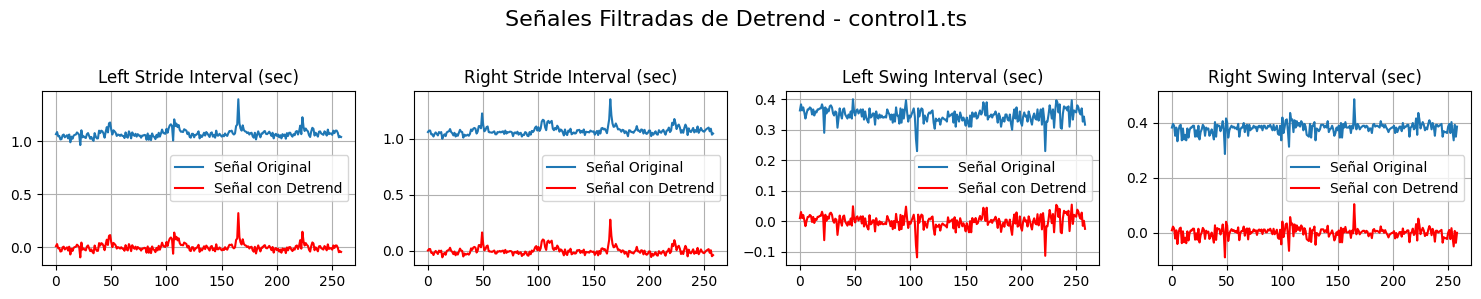

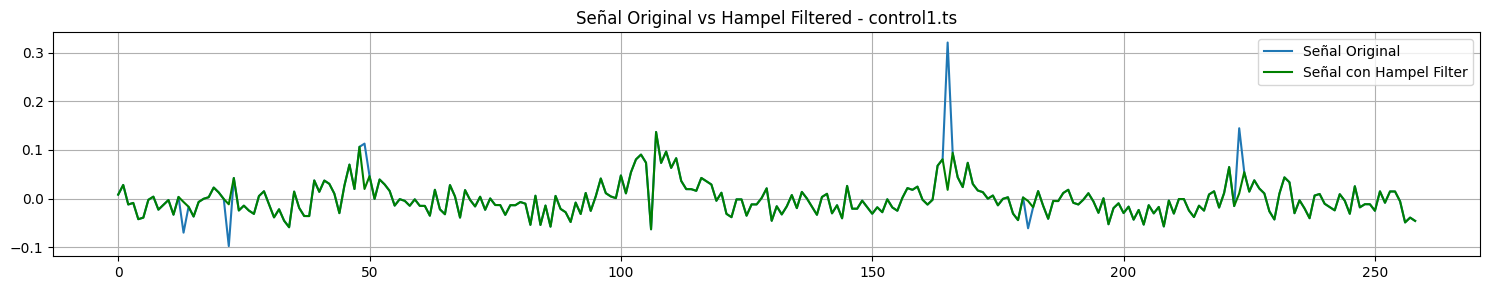

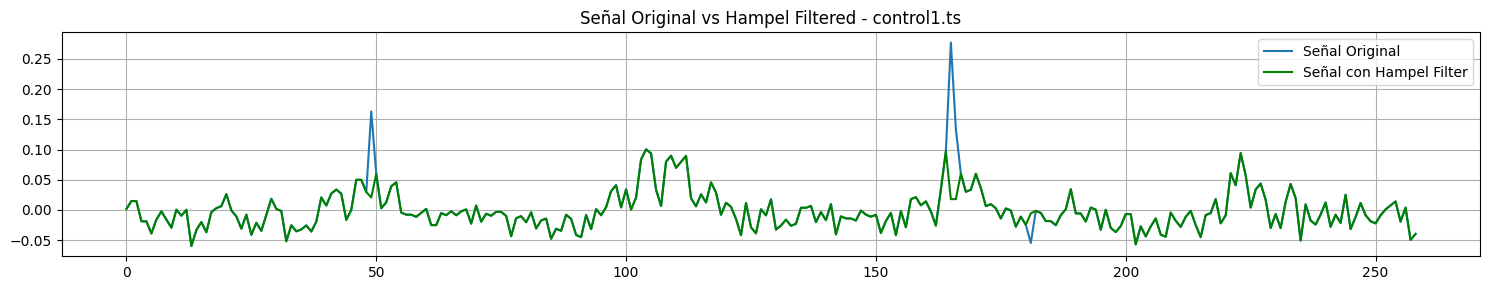

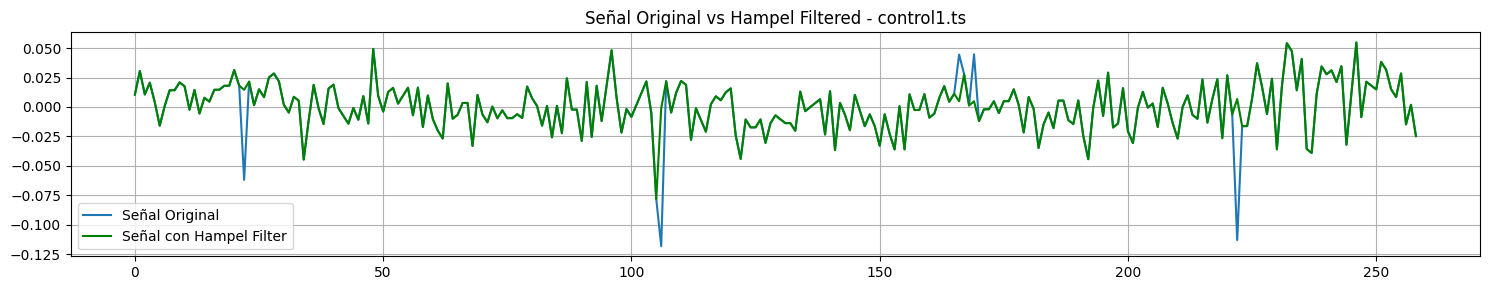

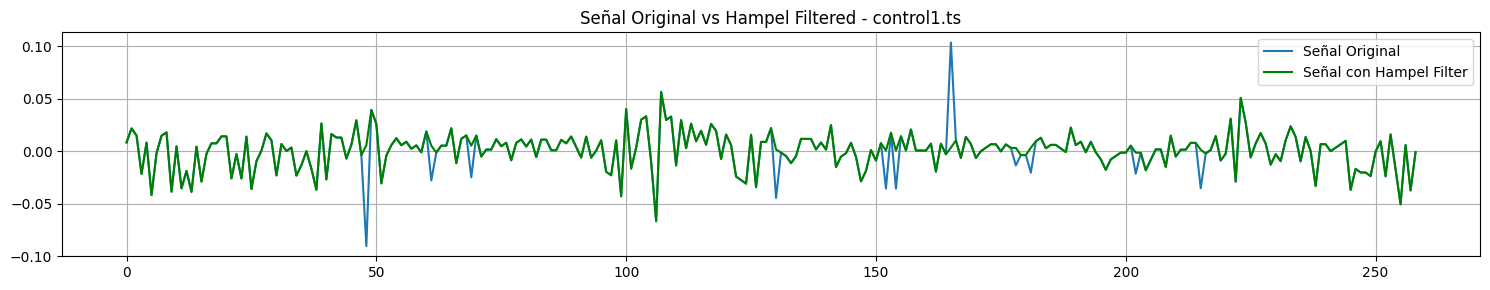

KeyboardInterrupt: 

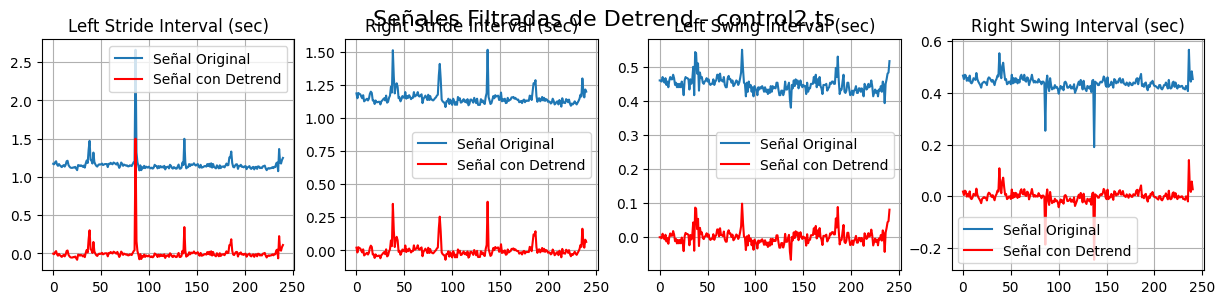

In [39]:
# Definir la ruta de la carpeta
# folder_path = r'C:\Users\Lenovo a9 w10\Desktop\LabBiosenales-1\assets\Proyecto_1\Data\Control\ts'
folder_path ="./Data/Control/ts"
title = "Control"
# Procesar todos los sujetos y obtener el DataFrame final
final_results_df_C = process_all_subjects(folder_path, title)
# Mostrar el DataFrame resultante
final_results_df_C 

Definir ruta. ESCLEROSIS LATERAL AMIOTROFICA

In [29]:

# Definir la ruta de la carpeta
# folder_path = r"C:\Users\Lenovo a9 w10\Desktop\LabBiosenales-1\assets\Proyecto_1\Data\Esclerosis_Lateral_Amiotrófica\ts"
# title = "ELA"
folder_path = "./Data/Esclerosis_Lateral_Amiotrófica/ts"
title = "Esclerosis_Lateral_Amiotrófica"
final_results_df_E = process_all_subjects(folder_path, title)
final_results_df_E

,Subject,Condition,Entropy_Left Stride Interval,CV_Left Stride Interval,SD_Left Stride Interval,Entropy_Right Stride Interval,CV_Right Stride Interval,SD_Right Stride Interval,Entropy_Left Swing Interval,CV_Left Swing Interval,SD_Left Swing Interval,Entropy_Right Swing Interval,CV_Right Swing Interval,SD_Right Swing Interval
0,als1,Esclerosis_Lateral_Amiotrófica,1.621994,257.890845,0.081399,1.605690,324.585065,0.087228,1.624007,9862.168321,0.039024,1.625859,9235.162730,0.025510
1,als2,Esclerosis_Lateral_Amiotrófica,1.616908,9731.807642,0.019907,1.595105,2046.109600,0.019122,1.622933,2363.084771,0.011713,1.624013,842.146412,0.016503
2,als3,Esclerosis_Lateral_Amiotrófica,1.615509,127.176593,0.064963,1.628522,95.489886,0.054700,1.625378,10033.624779,0.046087,1.620423,14297.491259,0.039715
3,als4,Esclerosis_Lateral_Amiotrófica,1.621934,99.663755,0.459876,1.625185,97.504593,0.430732,1.623133,5451.223301,0.065695,1.625580,2198.907169,0.080952
4,als5,Esclerosis_Lateral_Amiotrófica,1.606389,84.744688,0.044583,1.262168,309.774585,0.036818,1.626055,539.318701,0.020315,1.188434,1319.208878,0.011344
5,als6,Esclerosis_Lateral_Amiotrófica,1.628756,1898.015371,0.090943,1.628581,1381.857201,0.087410,1.627527,17696.005664,0.037396,1.616781,1025.121164,0.033220
6,als7,Esclerosis_Lateral_Amiotrófica,1.613840,12724.201069,0.118324,1.614653,9658.133986,0.115454,1.626595,1064.434207,0.034343,1.624064,5136.941398,0.041711
7,als8,Esclerosis_Lateral_Amiotrófica,1.627312,2011.498227,0.061759,1.608578,755.234728,0.047243,1.625159,1524.043069,0.032903,1.621933,114219.380600,0.016479
8,als9,Esclerosis_Lateral_Amiotrófica,1.622446,3128.993297,0.047615,1.610756,348.576964,0.047132,1.627929,4934.563380,0.020483,1.621262,6838.328050,0.020572
9,als10,Esclerosis_Lateral_Amiotrófica,1.628730,1066.563685,0.026312,1.625783,3870.736273,0.029887,1.616913,22597.181004,0.012053,1.617158,1775.100804,0.014913


Definir ruta. PARKINSON

In [30]:
# Definir la ruta de la carpeta
# folder_path = r"C:\Users\Lenovo a9 w10\Desktop\LabBiosenales-1\assets\Proyecto_1\Data\Parkinson\ts"
# title = "Parkinson"
folder_path = "./Data/Parkinson/ts"
title = "Parkinson"
final_results_df_P = process_all_subjects(folder_path, title)
final_results_df_P

,Subject,Condition,Entropy_Left Stride Interval,CV_Left Stride Interval,SD_Left Stride Interval,Entropy_Right Stride Interval,CV_Right Stride Interval,SD_Right Stride Interval,Entropy_Left Swing Interval,CV_Left Swing Interval,SD_Left Swing Interval,Entropy_Right Swing Interval,CV_Right Swing Interval,SD_Right Swing Interval
0,park1,Parkinson,1.628252,7213.060355,0.039965,1.629155,15263.019333,0.041220,1.622833,561.955496,0.025162,1.622502,1070.717404,0.036421
1,park2,Parkinson,1.620657,13475.755435,0.054590,1.580952,2124.315279,0.048248,1.604710,4211.227672,0.016740,1.623563,1065.687754,0.021912
2,park3,Parkinson,1.622894,593.927319,0.070925,1.629747,1361.556469,0.097494,1.623479,1969.368517,0.023438,1.623209,9989.656754,0.031726
3,park4,Parkinson,1.618632,1514.654082,0.066146,1.613206,872.765550,0.068543,1.625643,3787.486629,0.048305,1.624847,811.241809,0.029832
4,park5,Parkinson,1.626726,2823.542837,0.037634,1.625326,2241.404278,0.037326,1.609889,963.422289,0.021387,1.623520,892.327247,0.023738
5,park6,Parkinson,1.628878,1000.034550,0.034265,1.623984,1525.980913,0.041593,1.629199,1271.858631,0.029802,1.625383,7362.855658,0.023561
6,park7,Parkinson,1.614154,239.633083,0.106347,1.616131,259.479379,0.077828,1.617348,1727.671408,0.057195,1.620227,448.166071,0.033036
7,park8,Parkinson,1.623504,9447.014038,0.120963,1.626950,2028.088327,0.122300,1.627446,3637.092737,0.072383,1.616963,1034.184787,0.054690
8,park9,Parkinson,1.626085,303.671873,0.039754,1.611860,289.891300,0.039671,1.624793,885.145776,0.017946,1.614679,3152.868761,0.013663
9,park10,Parkinson,1.614747,5913.843641,0.052755,1.625528,1482.641354,0.056994,1.628812,1814.572454,0.022045,1.611289,1304.283405,0.049060


Definir ruta. HUNTINGTON

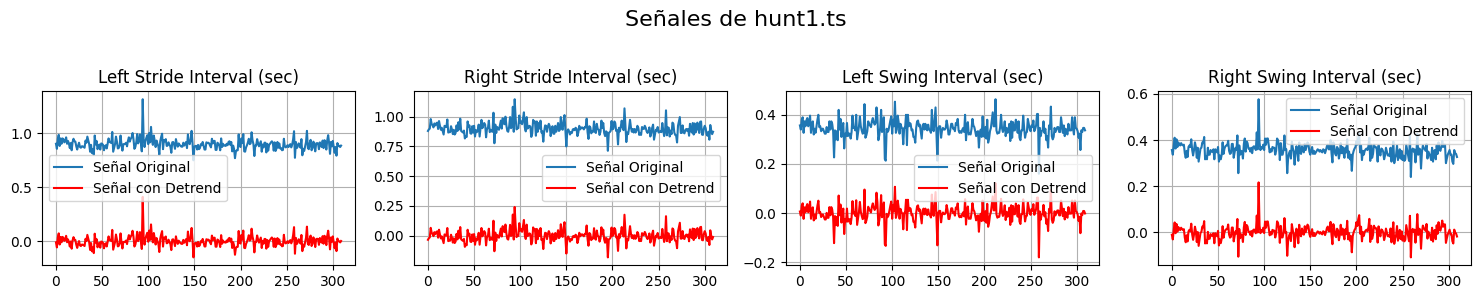

TypeError: apply_hampel_and_plot() got an unexpected keyword argument 'file_name'

In [59]:
# Definir la ruta de la carpeta
# folder_path = r"C:\Users\Lenovo a9 w10\Desktop\LabBiosenales-1\assets\Proyecto_1\Data\Huntington\ts"
# title = "Huntington"
folder_path = "./Data/Huntington/ts"
title = "Huntington"
final_results_df_H = process_all_subjects(folder_path, title)
final_results_df_H

In [32]:
final_df = pd.concat([final_results_df_C, final_results_df_P, final_results_df_E, final_results_df_H], ignore_index=True)
# Mostrar el DataFrame combinado
final_df

,Subject,Condition,Entropy_Left Stride Interval,CV_Left Stride Interval,SD_Left Stride Interval,Entropy_Right Stride Interval,CV_Right Stride Interval,SD_Right Stride Interval,Entropy_Left Swing Interval,CV_Left Swing Interval,SD_Left Swing Interval,Entropy_Right Swing Interval,CV_Right Swing Interval,SD_Right Swing Interval
0,control1,Control,1.609136,2541.428592,0.032673,1.628940,3.592245e+03,0.031323,1.628070,784.705679,0.017974,1.619731,3.152026e+03,0.017326
1,control2,Control,1.617451,330.561036,0.035726,1.616484,7.189183e+02,0.035454,1.601335,3300.333332,0.018268,1.623778,1.216875e+03,0.018220
2,control3,Control,1.600147,29878.896973,0.028789,1.621370,6.629054e+03,0.033704,1.604733,4194.300604,0.015279,1.594568,1.802621e+03,0.013864
3,control4,Control,1.624819,779.696576,0.012366,1.622348,1.507570e+03,0.013165,1.597136,2608.785032,0.007166,1.577919,2.816925e+03,0.007748
4,control5,Control,1.628615,410.526966,0.027140,1.630336,4.521652e+02,0.028012,1.593083,2779.407838,0.014108,1.618583,1.792999e+03,0.020341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,hunt16,Huntington,1.628545,5248.763502,0.251113,1.624518,1.282118e+03,0.228800,1.618956,1151.359942,0.161983,1.625542,8.063033e+02,0.111778
60,hunt17,Huntington,1.629032,688.065889,0.045211,1.622630,2.235084e+03,0.044153,1.626630,26684.180001,0.022276,1.628606,9.396688e+03,0.021129
61,hunt18,Huntington,1.628975,457.610111,0.205035,1.623892,5.351444e+02,0.208919,1.621049,1610.363084,0.110348,1.624421,7.453779e+02,0.121172
62,hunt19,Huntington,1.628340,2110.871308,0.085801,1.616689,1.136553e+03,0.080920,1.610540,3604.970667,0.052726,1.627234,6.589183e+03,0.063252


# Informe
### a. Discusión de las diferencias en los grupos usando las gráficas obtenidas usando estadística descriptiva 

In [23]:
from scipy.stats import zscore

In [24]:
import seaborn as sns

C:\Users\crist\AppData\Local\Temp\ipykernel_6544\3890939809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


<Figure size 640x480 with 0 Axes>

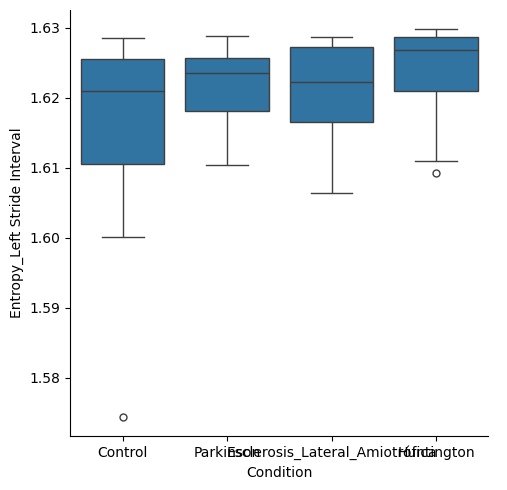

C:\Users\crist\AppData\Local\Temp\ipykernel_6544\3890939809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


<Figure size 640x480 with 0 Axes>

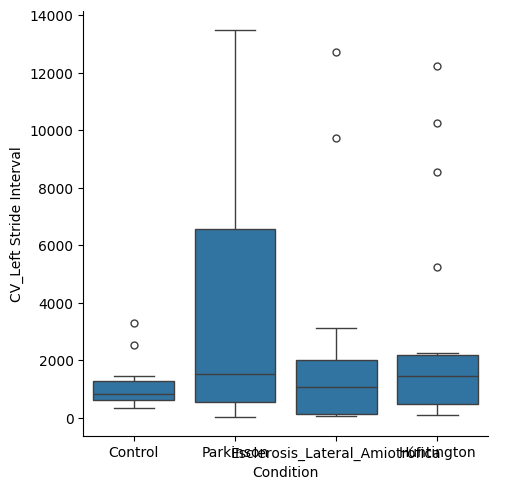

C:\Users\crist\AppData\Local\Temp\ipykernel_6544\3890939809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


<Figure size 640x480 with 0 Axes>

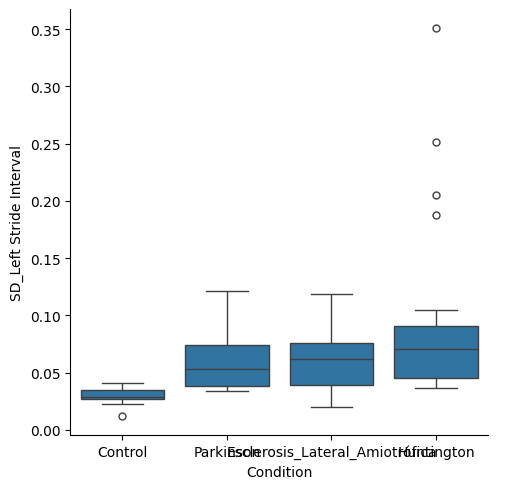

C:\Users\crist\AppData\Local\Temp\ipykernel_6544\3890939809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


<Figure size 640x480 with 0 Axes>

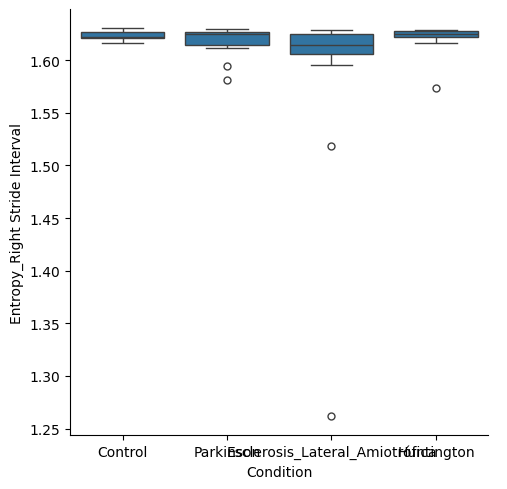

C:\Users\crist\AppData\Local\Temp\ipykernel_6544\3890939809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


<Figure size 640x480 with 0 Axes>

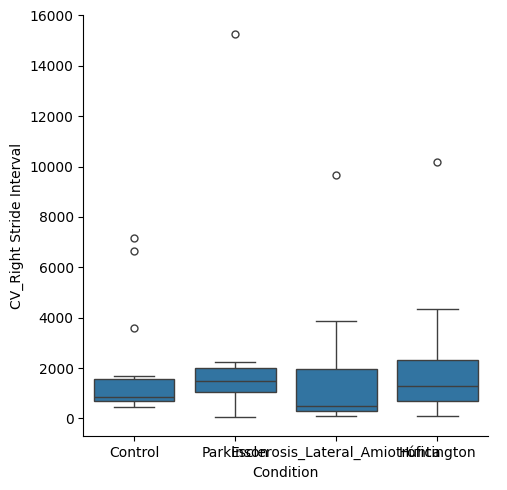

C:\Users\crist\AppData\Local\Temp\ipykernel_6544\3890939809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


<Figure size 640x480 with 0 Axes>

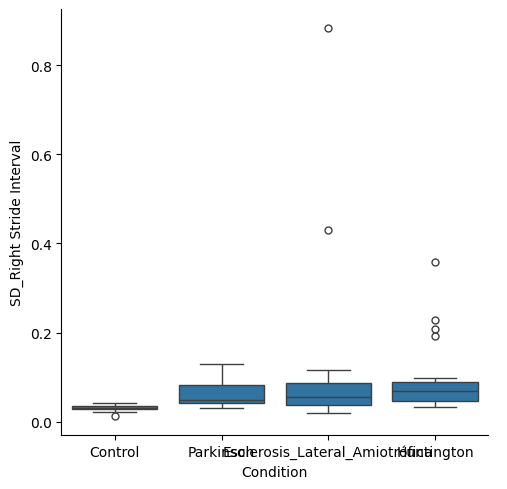

C:\Users\crist\AppData\Local\Temp\ipykernel_6544\3890939809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


<Figure size 640x480 with 0 Axes>

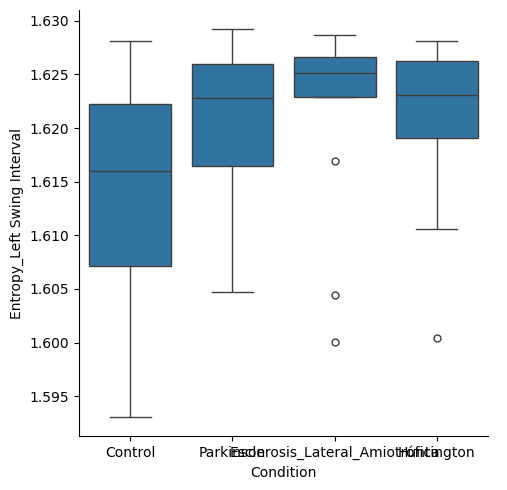

C:\Users\crist\AppData\Local\Temp\ipykernel_6544\3890939809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


<Figure size 640x480 with 0 Axes>

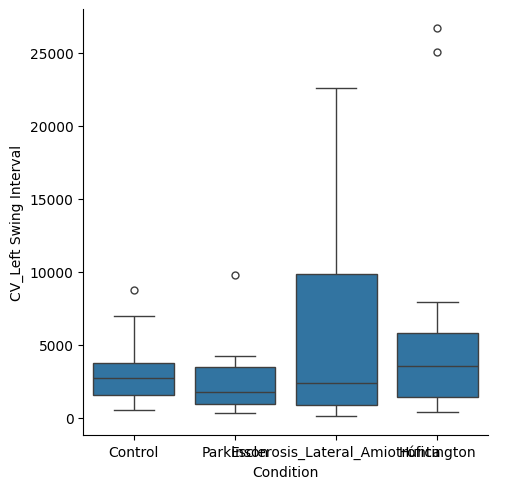

C:\Users\crist\AppData\Local\Temp\ipykernel_6544\3890939809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


<Figure size 640x480 with 0 Axes>

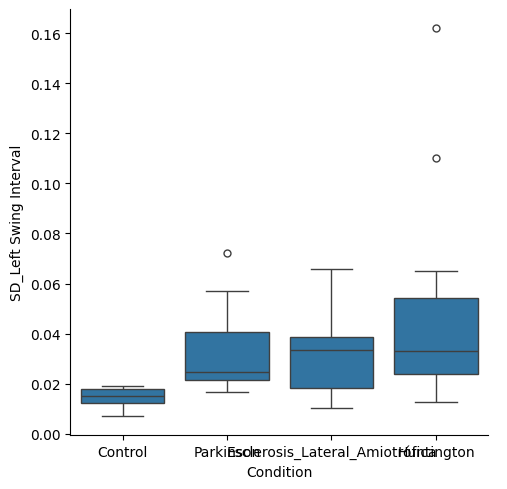

C:\Users\crist\AppData\Local\Temp\ipykernel_6544\3890939809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


<Figure size 640x480 with 0 Axes>

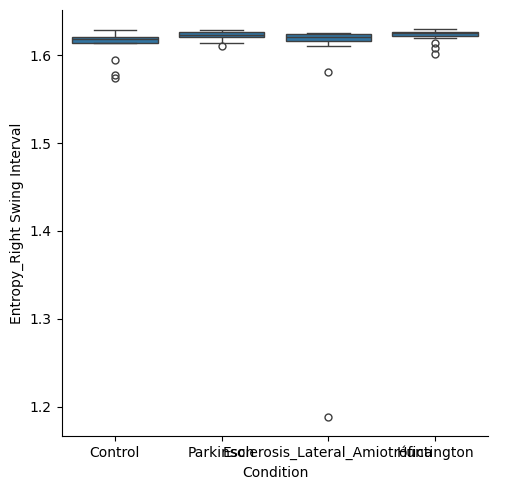

C:\Users\crist\AppData\Local\Temp\ipykernel_6544\3890939809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


<Figure size 640x480 with 0 Axes>

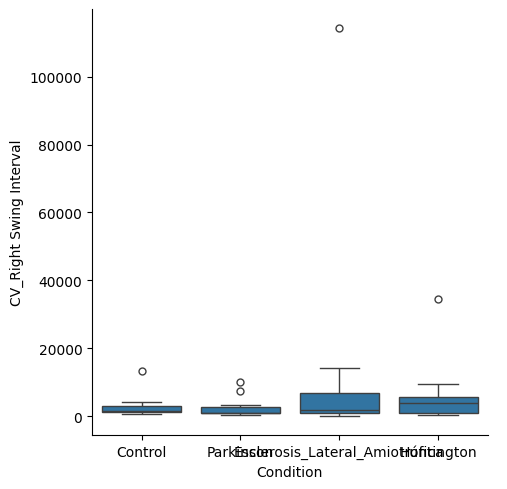

C:\Users\crist\AppData\Local\Temp\ipykernel_6544\3890939809.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[j] = data[j].apply(float)


<Figure size 640x480 with 0 Axes>

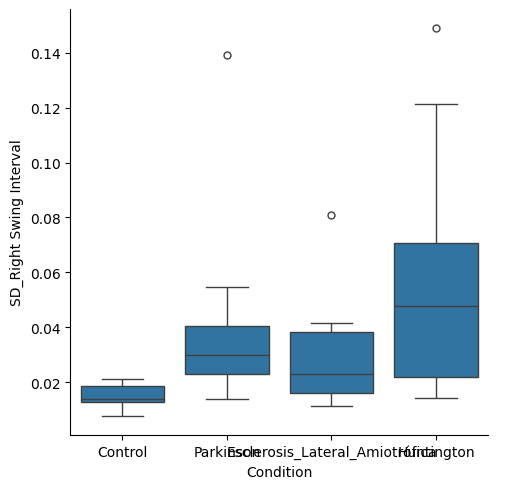

In [39]:
for i,j in enumerate(final_df.columns):
    if i <= 1:
        continue
    data = final_df[["Condition", j]]
    data[j] = data[j].apply(float)
    zscores = zscore(data[j])
    absScores = np.abs(zscores)
    data = data[absScores <= 3] # Esto elimina los datos atipicos
     
    plt.figure()
    sns.catplot(
    data=data, 
    kind="box", 
    x="Condition", 
    y=j
    )
    plt.show()
    


### b. 
- Planteamiento de las hipótesis nulas y alternativas 

- selección del tipo de prueba (paramétrica o no paramétrica)

- discusión de los resultados 

### c. Discutir los resultados obtenidos con los presentado en el artículo base 

### d. Proponer cuales de las medidas usadas podrían servir para discriminar que poblaciones clínicas de los controles

In [ ]:
#Borrar
folder_path ="./Data/Control/ts"
title = "Control"

# final_results_df_C = remove_trend(folder_path)
# # Mostrar el DataFrame resultante
# final_results_df_C 
files = sorted([f for f in os.listdir(folder_path)], key=numerical_sort)
for file_name in files:
    file_path = os.path.join(folder_path,file_name)
    # Cargar y extraer las señales
    signals = adquirir(file_path)
    
    # Remover tendencia
    detrended_signals = remove_trend(signals,file_name)
    
# detrended_signals

## BIBLIOGRAFÍA
[1]Sánchez Ochoa, Geanny, Cuello Almarales, Dany, & Almaguer Mederos, Luis E.. (2020). Acortamiento de telómeros en enfermedades neurodegenerativas: implicaciones terapéuticas. Revista Habanera de Ciencias Médicas, 19(5), . Epub 10 de noviembre de 2020. Recuperado en 09 de septiembre de 2024, de http://scielo.sld.cu/scielo.php?script=sci_arttext&pid=S1729-519X2020000600005&lng=es&tlng=pt.

[2]Martínez-Lazcano, J. C., Boll-Woehrlen, M. C., Hernández-Melesio, M. A., Rubio-Osornio, M., Sánchez-Mendoza, M. A., & Ríos, C. (2010). Radicales libres y estrés oxidativo en las enfermedades neurodegenerativas. Mensaje Bioquim, 34, 43-59. https://www.researchgate.net/profile/Francisca-Perez-Severiano/publication/265886313_Radicales_libres_y_estres_oxidativo_en_las_enfermedades_neurodegenerativas/links/54b6a77e0cf2bd04be324558/Radicales-libres-y-estres-oxidativo-en-las-enfermedades-neurodegenerativas.pdf

[3] Scipy Manual. detrend.  https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.detrend.html

[4] Mario Filho (2023). Detrending time series data with Python. https://forecastegy.com/posts/detrending-time-series-data-python/

[5] MathWorks. Hampel. https://la.mathworks.com/help/signal/ref/hampel.html

[6] Henry Miguel (2020). Entropía de permutación. https://www.aptech.com/blog/permutation-entropy/
